IMPORTING REQUIRED LIBRARIES

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [510]:
# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

IMPORT DATASET

In [511]:
books_dataset=pd.read_csv(r"D:\\Machine learning project\\books.csv")
books_dataset.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


GETTING INFERENCE FROM DATASET

In [512]:
# books_dataset.isnull().sum()

In [513]:
# (books_dataset.isnull().sum().sum()/books_dataset.shape[0]*books_dataset.shape[1])*100

In [514]:
books_dataset.value_counts()

bookID  title                                                                                                         authors                     average_rating  isbn        isbn13       language_code    num_pages  ratings_count  text_reviews_count  publication_date  publisher         
45641   Las aventuras de Tom Sawyer                                                                                   Mark Twain                  3.91            8497646983  9.7885E+12   spa            272          113            12                  5/28/2006         Edimat Libros         1
1       Harry Potter and the Half-Blood Prince (Harry Potter  #6)                                                     J.K. Rowling/Mary GrandPré  4.57            439785960   9.78044E+12  eng            652          2095690        27591               9/16/2006         Scholastic Inc.       1
2       Harry Potter and the Order of the Phoenix (Harry Potter  #5)                                                  J.K. Rowlin

In [515]:
books_dataset.shape

(11127, 12)

In [516]:
books_dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

to remove spaces between columns


In [517]:
books_dataset.columns=books_dataset.columns.str.strip()

In [518]:
# books_dataset.columns

In [519]:
books_dataset.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
num_pages             object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
dtype: object

In [520]:
books_dataset.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793647e+04,541.859531
std,13093.358023,1.124794e+05,2576.175586
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,46.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


#changing datatypes

In [521]:
books_dataset = books_dataset[pd.to_numeric(books_dataset['average_rating'], errors='coerce').notnull()]
books_dataset['average_rating'] = books_dataset['average_rating'].astype(float)


In [522]:
books_dataset['average_rating'] = books_dataset['average_rating'].astype(float)
books_dataset['num_pages'] = books_dataset['num_pages'].astype(float)


In [523]:
books_dataset['isbn13'] = books_dataset['isbn13'].astype(float).astype(int)
books_dataset['num_pages'] = books_dataset['num_pages'].astype(float).astype(int)

In [524]:
books_dataset.describe(include=object)

,title,authors,isbn,language_code,publication_date,publisher
count,11124,11124,11124,11124,11124,11123
unique,10349,6640,11124,27,3679,2290
top,The Brothers Karamazov,P.G. Wodehouse,8497646983,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


duplicate data

In [525]:
books_dataset.duplicated().any()

np.False_

In [526]:
books_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11124 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11124 non-null  int64  
 1   title               11124 non-null  object 
 2   authors             11124 non-null  object 
 3   average_rating      11124 non-null  float64
 4   isbn                11124 non-null  object 
 5   isbn13              11124 non-null  int64  
 6   language_code       11124 non-null  object 
 7   num_pages           11124 non-null  int64  
 8   ratings_count       11124 non-null  int64  
 9   text_reviews_count  11124 non-null  int64  
 10  publication_date    11124 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


feature engineering
extract important features
reduce the size of feature
creating new features from the existing ones

In [527]:
books_dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [528]:
books_dataset.isbn13.nunique()

239

In [529]:
books_dataset.drop(['bookID','isbn','isbn13'],axis=1,inplace=True)

In [530]:
books_dataset.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11122    12/21/2004
11123     12/1/1988
11124      8/1/1993
11125     2/27/2007
11126     5/28/2006
Name: publication_date, Length: 11124, dtype: object

In [531]:
books_dataset['year']=books_dataset['publication_date'].str.split('/')
books_dataset['year']=books_dataset['year'].apply(lambda x:x[2])

In [532]:
books_dataset.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004


In [533]:
books_dataset['year'] = books_dataset['year'].astype(float).astype(int)

In [534]:
books_dataset['year'].min(),books_dataset['year'].max()

(np.int64(1900), np.int64(2020))

Data visualization

exploratory data analysis

In [535]:
books_dataset.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [536]:
books_dataset[books_dataset['year']==1900][['title','authors','average_rating','language_code','num_pages','publisher']]

,title,authors,average_rating,language_code,num_pages,publisher
9375,Consider the Lilies,Iain Crichton Smith/Isobel Murray,3.88,eng,144,Polygon


In [537]:
books_dataset.groupby(['year'])['title'].agg('count').sort_values(ascending=False).head(20)

year
2006    1700
2005    1260
2004    1070
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

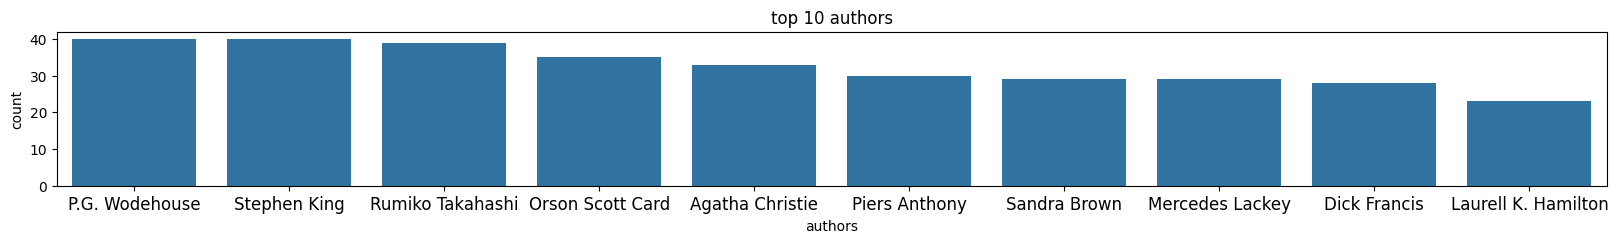

In [538]:
plt.figure(figsize=(20,2))
sns.countplot(x='authors',data=books_dataset,
              order=books_dataset['authors'].value_counts().iloc[:10].index)
plt.title("top 10 authors")
plt.xticks(fontsize=12)
plt.show()

In [539]:
# books_dataset.language_code.value_counts()

In [540]:
books_dataset.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [541]:
books_dataset.groupby(['language_code'])[['average_rating','ratings_count','text_reviews_count']].agg('mean').style.background_gradient(cmap='Wistia')

,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914422,3771.271824,160.247693
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_6320\141391559.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = book.index, y = book,


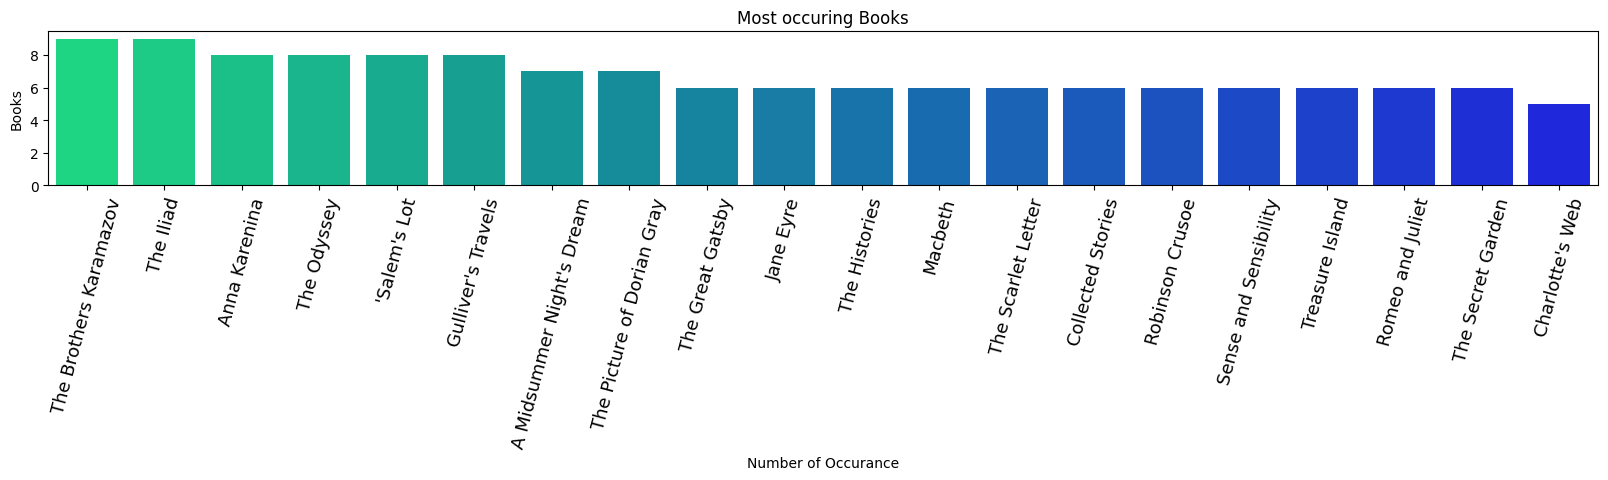

In [542]:
# to find most occuring book in our data
plt.figure(figsize = (20, 2))
book = books_dataset['title'].value_counts()[:20]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_6320\1131837128.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(books_dataset['average_rating'])


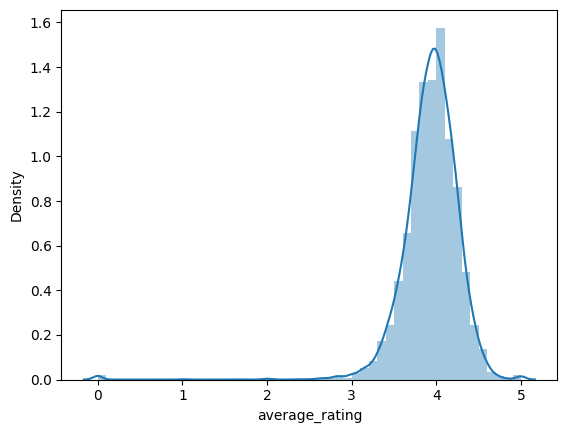

In [543]:
sns.distplot(books_dataset['average_rating'])
plt.show()

In [544]:
books_dataset[books_dataset.average_rating == books_dataset.average_rating.max()][['title','authors','language_code','publisher']]


,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4126,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4790,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4935,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5025,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc
5476,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5478,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


<function matplotlib.pyplot.show(close=None, block=None)>

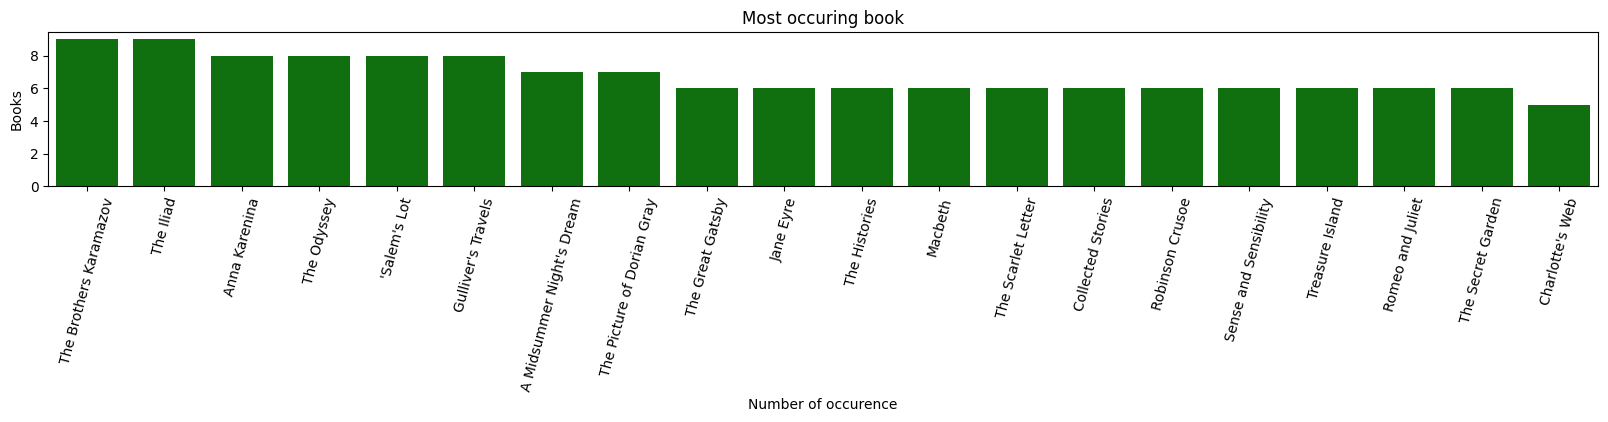

In [545]:
#to find most occuring book in our dataset
book=books_dataset['title'].value_counts()[:20]
book
plt.figure(figsize=(20,2))
sns.barplot(x=book.index,y=book,color='green')
plt.title("Most occuring book")
plt.xticks(rotation=75,fontsize=10)
plt.xlabel("Number of occurence")
plt.ylabel("Books")
plt.show

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_6320\1905311348.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(books_dataset['average_rating'])


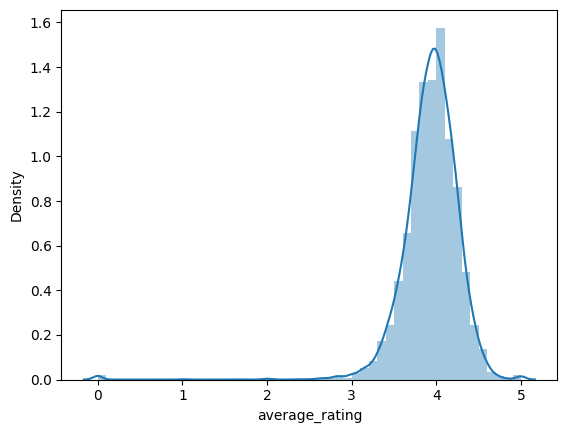

In [546]:
#to check most reviewed 
sns.distplot(books_dataset['average_rating'])
plt.show()

In [547]:
books_dataset[books_dataset['average_rating']==books_dataset.average_rating.max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4126,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4790,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4935,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5025,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc
5476,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5478,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


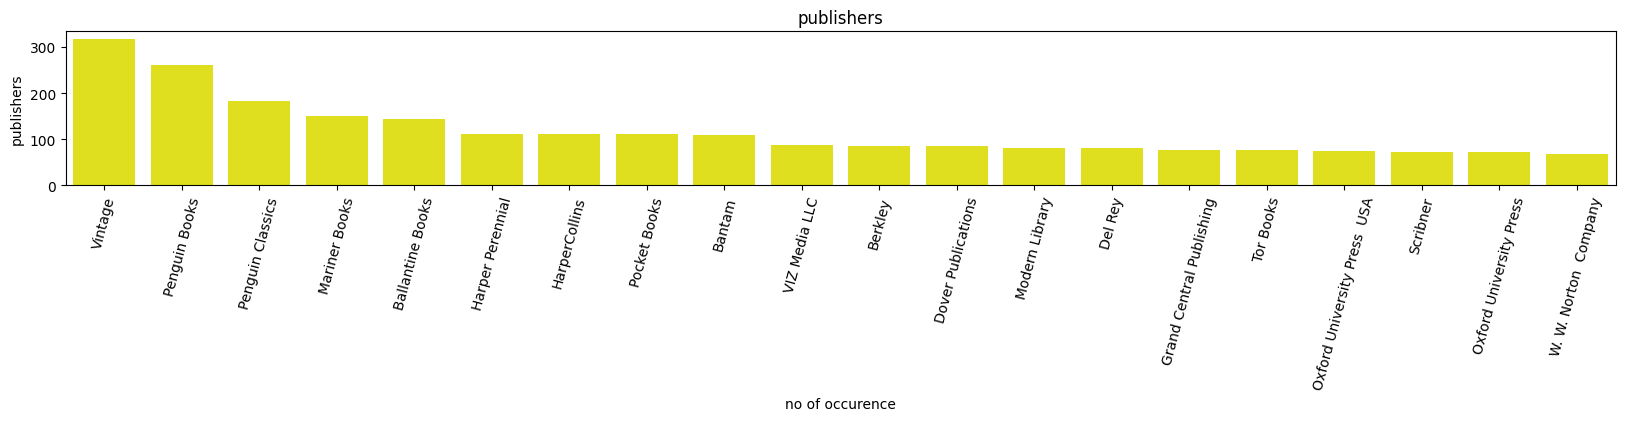

In [548]:
publisher=books_dataset['publisher'].value_counts()[:20]
plt.figure(figsize=(20,2))
sns.barplot(x=publisher.index,y=publisher,color='yellow')
plt.title("publishers")
plt.xlabel("no of occurence")
plt.ylabel("publishers")
plt.xticks(rotation=75,fontsize=10)
plt.show()

Book recommendation based on publisher,author and language

In [549]:
books_dataset.publisher.value_counts()

publisher
Vintage               318
Penguin Books         261
Penguin Classics      184
Mariner Books         150
Ballantine Books      144
                     ... 
Five Star (ME)          1
Nimble Books            1
Presses de La Cite      1
Hub City Press          1
Acento Editorial        1
Name: count, Length: 2290, dtype: int64

In [550]:
books_dataset.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [551]:
def recommend_book_publishers(x):
    a=books_dataset[books_dataset['publisher']==x][['title','average_rating']]
    a=a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

In [552]:
recommend_book_publishers('Vintage')

,title,average_rating
7374,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10842,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9630,Nobody Knows My Name,4.35
3112,All of Us: The Collected Poems,4.30
2267,The Stories of Vladimir Nabokov,4.30
8790,Selected Stories,4.28
4020,Selected Stories,4.28


In [553]:
# required_columns = ['title', 'average_rating']
# if all(column in books_dataset.columns for column in required_columns):
#     # Proceed with your function
#     code = recommend_book_publishers('Vintage')
# else:
#     print("One or more required columns are missing.")


In [554]:
recommend_book_publishers('Penguin Books')

,title,average_rating
4245,The Complete Maus,4.55
5566,The Penguin Companion to European Literature,4.50
1381,Before The Mayflower A History of Black America,4.44
4603,Selected Non-Fictions,4.43
3011,The Read-Aloud Handbook,4.41
4552,Life With Jeeves (Jeeves #6 2 & 4),4.39
1275,East of Eden,4.37
3304,Ludwig Wittgenstein: The Duty of Genius,4.36
4982,Life at Blandings,4.35
7707,Postwar: A History of Europe Since 1945,4.34


In [555]:
@interact
def recomd_books_publishers(publisher_name = list(books_dataset['publisher'].value_counts().index)):
    a = books_dataset[books_dataset['publisher'] == publisher_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

In [556]:
books_dataset.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

based on authors

In [557]:
@interact
def recomd_books_authors(authors_name = list(books_dataset['authors'].value_counts().index)):
    a = books_dataset[books_dataset['authors'] == authors_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='authors_name', options=('P.G. Wodehouse', 'Stephen King', 'Rumiko …

In [558]:
 books_dataset.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [559]:
@interact
def recomd_books_lang(language = list(books_dataset['language_code'].value_counts().index)):
    a = books_dataset[books_dataset['language_code'] == language][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

Data Preprocessing

In [560]:
books_dataset.head(1)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006


In [561]:
def num_to_obj(x):
    if x >0 and x <=1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <=3:
        return "between 2 and 3"
    if x >3 and x<=4:
        return "between 3 and 4"
    if x >4 and x<=5:
        return "between 4 and 5"
books_dataset['rating_obj'] = books_dataset['average_rating'].apply(num_to_obj)

In [562]:
books_dataset['rating_obj'].value_counts()

rating_obj
between 3 and 4    6286
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: count, dtype: int64

encoding using dummies

In [563]:
rating_books_dataset = pd.get_dummies(books_dataset['rating_obj'])
rating_books_dataset.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [569]:
books_dataset.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year', 'rating_obj'],
      dtype='object')

In [565]:
language_books_dataset = pd.get_dummies(books_dataset['language_code'])
language_books_dataset.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [573]:
features = pd.concat([rating_books_dataset,language_books_dataset, books_dataset['average_rating'],
                    books_dataset['ratings_count'], books_dataset['title']], axis = 1)
features.set_index('title', inplace= True)
features.head(1)

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.57,2095690


bring data in the format of 0 and 1

In [574]:
from sklearn.preprocessing import MinMaxScaler 

In [575]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [576]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

model building

In [577]:
from sklearn import neighbors

In [583]:
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm = 'ball_tree', metric= 'euclidean')
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [584]:
books_dataset['title'].value_counts()

title
The Brothers Karamazov                9
The Iliad                             9
Anna Karenina                         8
The Odyssey                           8
'Salem's Lot                          8
                                     ..
Fantastic Mr Fox                      1
Fantastic Mr. Fox (Cover to Cover)    1
Ajax in Action                        1
Historia del rey transparente         1
Death Match                           1
Name: count, Length: 10349, dtype: int64

In [589]:
# @interact
# def BookRecommended(book_name = list(books_dataset['title'].value_counts().index)):
#     book_list_name = []
#     book_id = books_dataset[books_dataset['title'] == book_name.index]
#     book_id = book_id[0]
#     for newid in idlist[book_id]:
#         book_list_name.append(books_dataset.iloc[newid].title)
#     return book_list_name

recommendation

In [ ]:
from ipywidgets import interact

@interact 
def BookRecommended(book_name=list(books_dataset['title'].unique())):
    book_list_name = []
    
    # Find the index of the selected book in books_dataset
    book_id_series = books_dataset[books_dataset['title'] == book_name].index
    
    if len(book_id_series) == 0:
        return f"No book found with the title '{book_name}'"
    
    # Get the first index that matches the selected book
    book_id = book_id_series[0]
    
    # Loop through IDs of recommended books (if idlist is a dictionary with book IDs)
    if book_id in idlist:
        for newid in idlist[book_id]:
            book_list_name.append(books_dataset.iloc[newid].title)
    
    return book_list_name


interactive(children=(Dropdown(description='book_name', options=('Harry Potter and the Half-Blood Prince (Harr…